In [36]:
## The Data Science field has become a very hot field over the past few years.
## Many people are looking to go into the data science field, with the hope
## of making a lot of money. Supprisedly, many do not know the diversity
## in the data science field. In this project, we will explore the various
## data science fields, as well as the salaries of each field.
## We will also use that information to predict salaries of the data science fields.


### The dataset used in this study is taken from kaggle, an online platform for
## data science. The dataset contains:

### 1. work_year: The year the salary was paid
### 2. experience_level: The level of experience in the job during the year
### 3. job_title: The title of the job worked in during the year
### 4. employment_type: The type of job employment for the role
### 5. employee_residence: The primary country of residence of the employee during the work year as an ISO 3166 country code
### 6. remote_ratio: The ratio of remote work done
### 7. company_location: The primary country of residence of the company during the work year
### 8. company_size: The median number of employees workin in the company.
### 9. salary_in_usd: The salary of the employee in USD
### 10. salary_currency: The currency of the salary
### 11. salary: The gross salary paid.

### Importation of important libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import date

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import make_scorer, r2_score, mean_absolute_error as mae
from sklearn.model_selection import GridSearchCV


In [38]:
#!pip install --upgrade --force-reinstall matplotlib

In [39]:
os.getcwd()

'C:\\Users\\manag\\OneDrive\\Desktop\\Blossom_Anita Eshun\\My lessons\\Materials\\py_accra Workshop'

In [40]:
dat = pd.read_csv('ds_salaries.csv')

In [41]:
dat['job_title'].value_counts()

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

In [7]:
dat

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [8]:
dat.shape

(3755, 11)

In [9]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [10]:
dat.drop(dat[['salary','salary_currency']],axis=1,inplace=True)

In [11]:
dat.head(4)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M


In [12]:
dat[dat.duplicated()]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,US,100,US,L


In [13]:
dat['work_year'].value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

In [14]:
dat.describe(include=object).T

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,93,Data Engineer,1040
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


In [15]:
dat.describe(include=int)

,work_year,salary_in_usd,remote_ratio
count,3755.000000,3755.000000,3755.000000
mean,2022.373635,137570.389880,46.271638
std,0.691448,63055.625278,48.589050
min,2020.000000,5132.000000,0.000000
25%,2022.000000,95000.000000,0.000000
50%,2022.000000,135000.000000,0.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


In [16]:
dat.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [17]:
dat['work_year'].value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

In [18]:
dat['job_title'].value_counts()

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

In [42]:
word_eng = 'Engineer'
word_dsci = 'Data Scientist'
word_architect = 'Architect'
word_analyst = 'Analyst'
word_analystics = 'Analytics'
word_researcher = 'Data Researcher'
word_manager = 'Manager'
word_lead = 'Lead'
word_machine = 'Machine'

for i in dat['job_title']:
    if word_eng in i:
        dat['job_title'] = dat['job_title'].replace(i,'Data Engineer')
    elif word_dsci in i:
        dat['job_title'] = dat['job_title'].replace(i,'Data Scientist')
    elif word_architect in i:
        dat['job_title'] = dat['job_title'].replace(i,'Data Architect')
    elif word_analyst or word_analytics in i:
        dat['job_title'] = dat['job_title'].replace(i,'Data Analyst')
    elif word_researcher in i:
        dat['job_title'] = dat['job_title'].replace(i,'Data Researcher')
    elif word_manager in i:
        dat['job_title'] = dat['job_title'].replace(i,'Data Manager')
    elif word_lead in i:
        dat['job_title'] = dat['job_title'].replace(i,'Data Manager')
    elif word_machine in i:
        dat['job_title'] = dat['job_title'].replace(i,'Machine Learning Scientist')

In [43]:
dat['job_title'].value_counts()

job_title
Data Engineer     1640
Data Analyst      1139
Data Scientist     871
Data Architect     105
Name: count, dtype: int64

In [21]:
cross_tab = pd.crosstab(dat['job_title'],dat['work_year'])

<Axes: xlabel='job_title'>

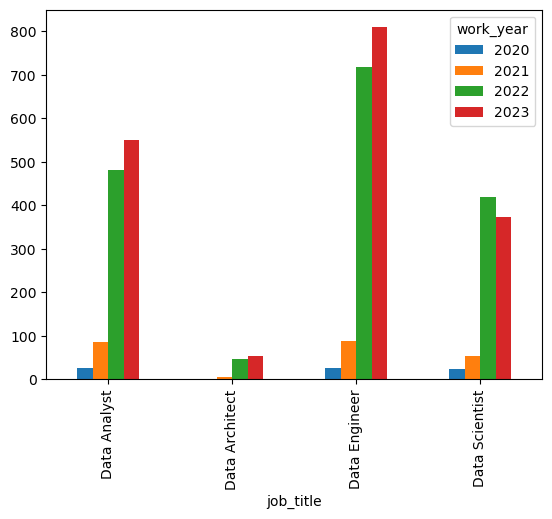

In [22]:
cross_tab.plot(kind='bar')

In [23]:
avg_sal = dat.groupby(['job_title','work_year'], as_index = False)['salary_in_usd'].mean()
avg_sal
min_sal = dat.groupby(['job_title', 'work_year'], as_index = False)['salary_in_usd'].min()
min_sal
max_sal = dat.groupby(['job_title', 'work_year'], as_index = False)['salary_in_usd'].max()



C:\Users\manag\AppData\Local\Temp\ipykernel_25344\3682488673.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='job_title', y='salary_in_usd', hue='work_year', data=avg_sal, ci=None, palette="Paired")
C:\Users\manag\AppData\Local\Temp\ipykernel_25344\3682488673.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='job_title', y='salary_in_usd', hue='work_year', data=min_sal, ci=None, palette="Set1")
C:\Users\manag\AppData\Local\Temp\ipykernel_25344\3682488673.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='job_title', y='salary_in_usd', hue='work_year', data=max_sal, ci=None, palette="Set2")


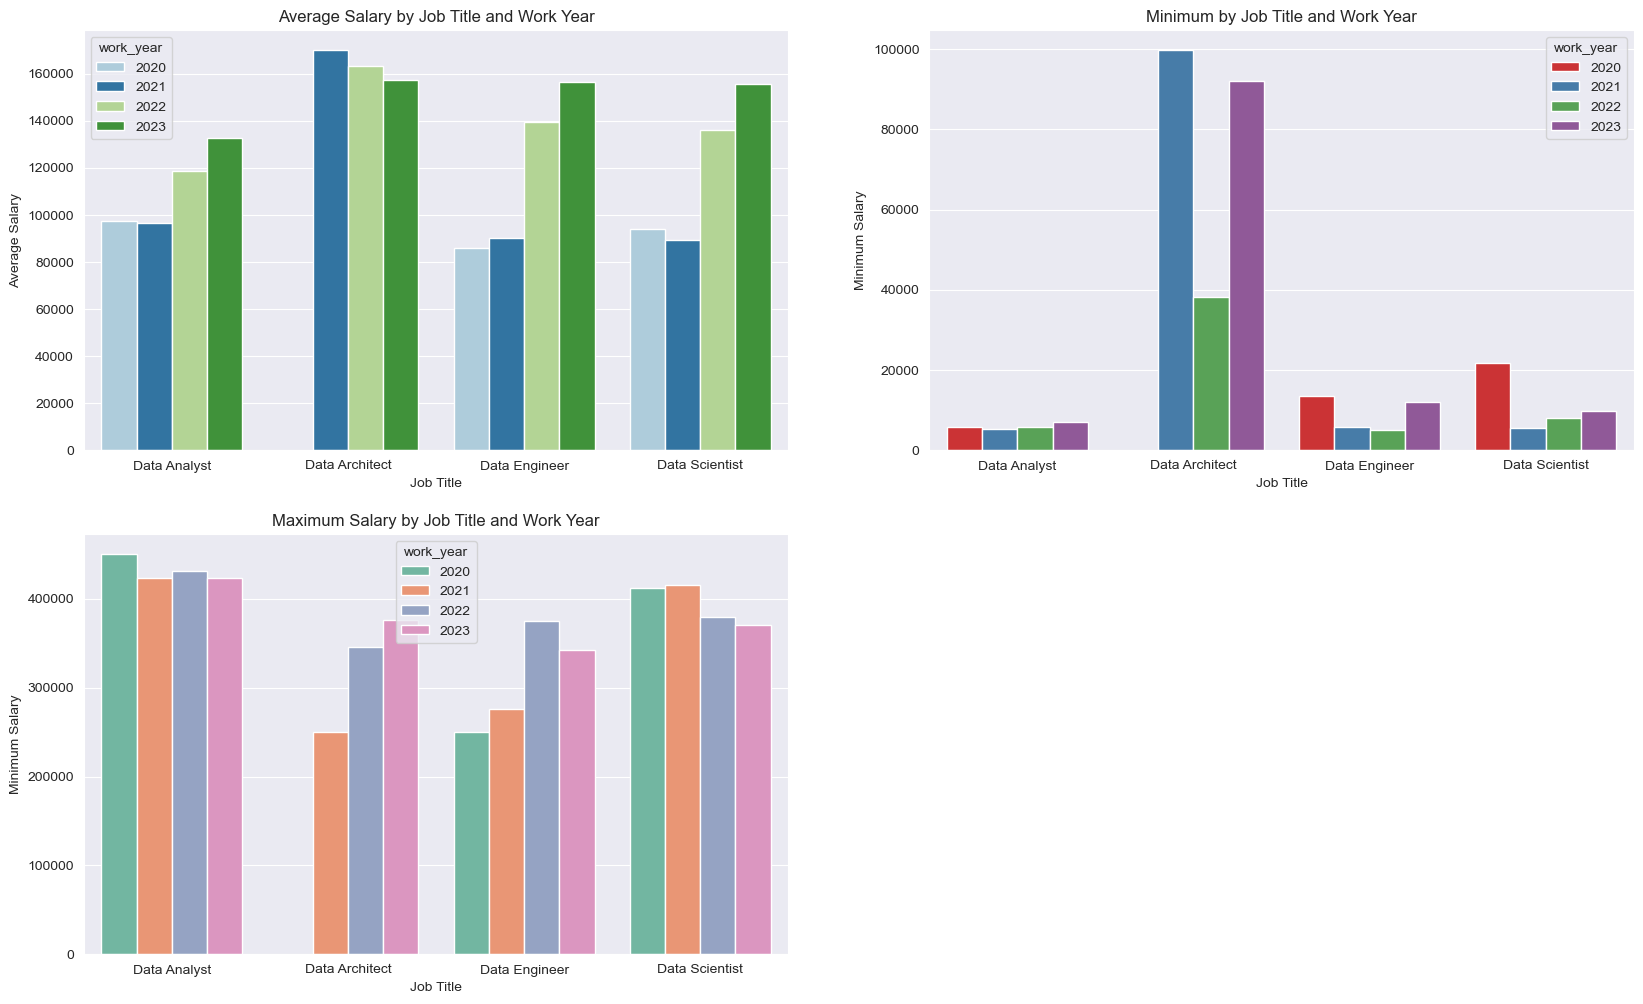

In [24]:
sns.set_style("darkgrid")

plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)
sns.barplot(x='job_title', y='salary_in_usd', hue='work_year', data=avg_sal, ci=None, palette="Paired")
plt.title('Average Salary by Job Title and Work Year')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')

plt.subplot(2,2,2)
sns.barplot(x='job_title', y='salary_in_usd', hue='work_year', data=min_sal, ci=None, palette="Set1")
plt.title('Minimum by Job Title and Work Year')
plt.xlabel('Job Title')
plt.ylabel('Minimum Salary')

plt.subplot(2,2,3)
sns.barplot(x='job_title', y='salary_in_usd', hue='work_year', data=max_sal, ci=None, palette="Set2")
plt.title('Maximum Salary by Job Title and Work Year')
plt.xlabel('Job Title')
plt.ylabel('Minimum Salary')
plt.show()

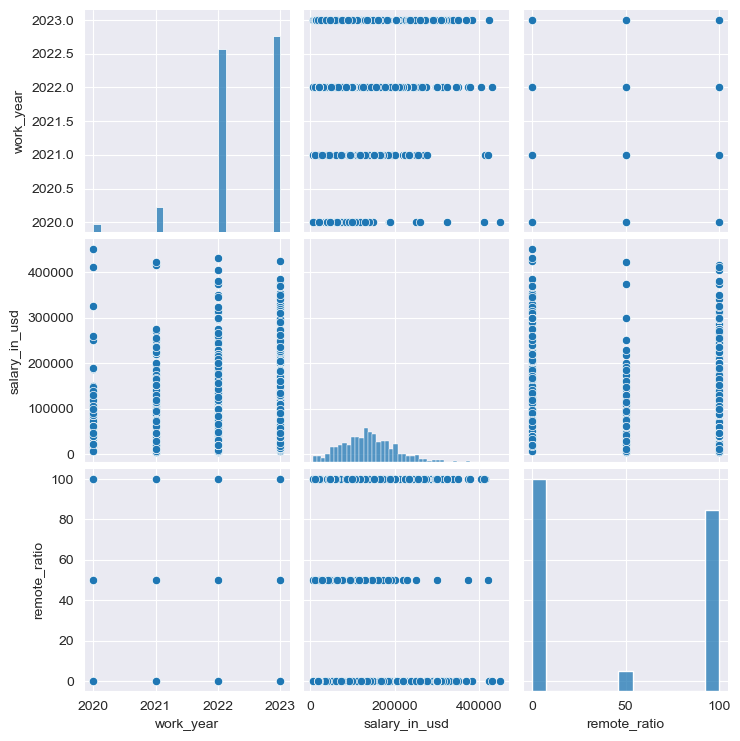

In [25]:
sns.set_style("darkgrid")
sns.pairplot(dat)
         

In [26]:
cat_variable = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
l_encoder = LabelEncoder()

for cat in cat_variable:
    dat[cat] = l_encoder.fit_transform(dat[cat])


In [27]:
dat.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,3,85847,26,100,25,0
1,2023,2,0,2,30000,75,100,70,2
2,2023,2,0,2,25500,75,100,70,2
3,2023,3,2,3,175000,11,100,12,1
4,2023,3,2,3,120000,11,100,12,1


In [28]:
features = dat.drop(['salary_in_usd'],axis = 1)
target = dat['salary_in_usd']

In [29]:
features

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,3,26,100,25,0
1,2023,2,0,2,75,100,70,2
2,2023,2,0,2,75,100,70,2
3,2023,3,2,3,11,100,12,1
4,2023,3,2,3,11,100,12,1
...,...,...,...,...,...,...,...,...
3750,2020,3,2,3,75,100,70,0
3751,2021,2,2,3,75,100,70,0
3752,2020,0,2,3,75,100,70,2
3753,2020,0,0,0,75,100,70,0


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


In [31]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=100)

In [32]:
algs = {'linear_reg':LinearRegression(),'KNN':KNeighborsRegressor(),'SVM':SVR(),'Decision_tree':DecisionTreeRegressor(),\
       'Random_forest':RandomForestRegressor(),'Adaboost':AdaBoostRegressor(),'Gradboost':GradientBoostingRegressor()}

In [33]:
errors = {}
for alg_name,alg in algs.items():
    alg.fit(X_train,y_train)

    y_pred = alg.predict(X_test)
    err = mae(y_test,y_pred)
    errors[alg_name] = err
    

print('Error when there is no hyperparameter tuning:\n')
print(sorted(errors.items(),key=lambda x: x[1]))

Error when there is no hyperparameter tuning:

[('Gradboost', 39035.92132190892), ('Random_forest', 39527.34208135014), ('KNN', 40922.50386151797), ('Decision_tree', 41229.2182026119), ('linear_reg', 42391.75498034482), ('Adaboost', 45423.88604469492), ('SVM', 49125.82995038808)]


In [34]:
param_grids = {
    'linear_reg': {
        'fit_intercept': [True, False]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 1]
    },
    'Decision_tree': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random_forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Adaboost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'Gradboost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'max_depth': [3, 5, 7]
    }
}


In [35]:
errors = {}
best_params = {}

for alg_name, alg in algs.items():
    print('Implementing hyperparameters tuning for '+alg_name)

    grid_search = GridSearchCV(
        estimator = alg,
        param_grid = param_grids[alg_name],
        scoring = make_scorer(mae, greater_is_better=False),
        cv = 10
    )

    grid_search.fit(X_train,y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    err = mae(y_test,y_pred)

    errors[alg_name] = err
    best_params[alg_name] = grid_search.best_estimator_
    

print('\nOutputing the sorted erros when hyperparameter is implemented:\n ')
print(sorted(errors.items(), key=lambda x: x[1]))
print('\nThe hyperparameters that produced the best models:\n ')
print(best_params)

Implementing hyperparameters tuning for linear_reg
Implementing hyperparameters tuning for KNN
Implementing hyperparameters tuning for SVM
Implementing hyperparameters tuning for Decision_tree
Implementing hyperparameters tuning for Random_forest
Implementing hyperparameters tuning for Adaboost
Implementing hyperparameters tuning for Gradboost

Outputing the sorted erros when hyperparameter is implemented:
 
[('Gradboost', 39170.10780203614), ('Random_forest', 39290.903024994266), ('Decision_tree', 39823.68620118094), ('Adaboost', 40675.551583898465), ('KNN', 41583.38378198541), ('linear_reg', 42391.75498034482), ('SVM', 49124.75148137557)]

The hyperparameters that produced the best models:
 
{'linear_reg': LinearRegression(), 'KNN': KNeighborsRegressor(n_neighbors=9, p=1, weights='distance'), 'SVM': SVR(C=10, epsilon=0.01), 'Decision_tree': DecisionTreeRegressor(max_depth=5, min_samples_leaf=4), 'Random_forest': RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=2

In [36]:
best_model

GradientBoostingRegressor(n_estimators=200)

In [37]:
import joblib
joblib.dump(best_model, 'model.pkl')

['model.pkl']

'3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]'